In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.tree import plot_tree

In [ ]:
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
x=iris.data
y=iris.target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

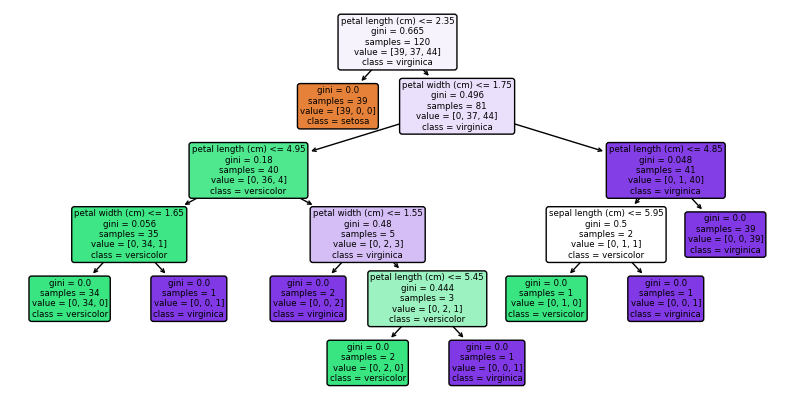

In [ ]:
plt.figure(figsize=(10, 5))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

In [ ]:
cm=confusion_matrix(y_pred,y_test)
cm_df=pd.DataFrame(cm,index=['Setosa','Virginica','Versicolor'],
                   columns=['Setosa','Virginica','Versicolor'])
cm_df

,Setosa,Virginica,Versicolor
Setosa,11,0,0
Virginica,0,13,0
Versicolor,0,0,6


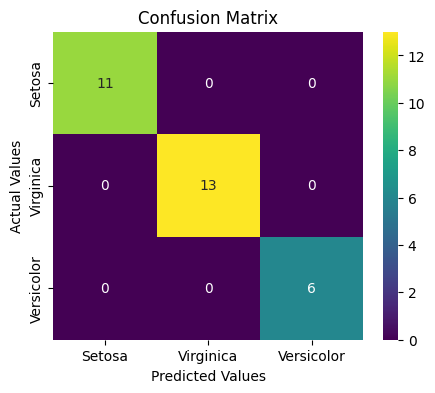

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df,cmap='viridis',annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)

# Print the classification report
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("The accuracy of Decision Tree Classifier is ",accuracy)

The accuracy of Decision Tree Classifier is  1.0
